<a href="https://colab.research.google.com/github/tuntul17/Others/blob/main/FIZ463hw2p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pylab import *
import numpy as np
from scipy.signal import find_peaks

In [2]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23
Wdc=  2898e-6  #WiensDisplacementConstant

In [3]:
def planck(w, T):
    a = 2.0*h*c**2
    b = h*c/(w*k*T)
    I = a/ ( (w**5) * (np.exp(b) - 1.0) )
    return I

In [8]:
# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wl = np.arange(10**-9, 3*10**-6, 10**-9) 

intensity4 = planck(wl,4000)
intensity5 =planck(wl,5000)
intensity6 = planck(wl,6000)

<ipython-input-3-4d00e50a2a7b>:4: RuntimeWarning: overflow encountered in exp
  I = a/ ( (w**5) * (np.exp(b) - 1.0) )


In [9]:
#Obtain the maximum points of each tempratures

p4m = max(intensity4)
p5m = max(intensity5)
p6m = max(intensity6)
wl4, wl5,wl6 = 0,0,0


for i in range(len(wl)):
  if intensity4[i] == p4m:
    wl4 = i
  if intensity5[i] == p5m:
    wl5 = i
  if  intensity6[i] == p6m:
    wl6 = i


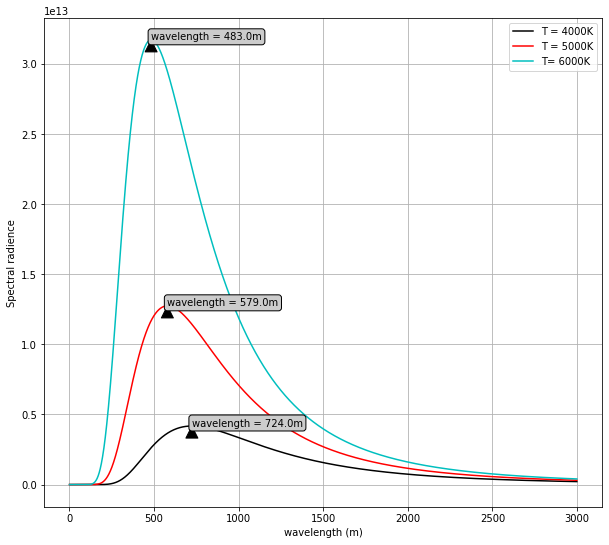

In [13]:
#plots
r = 100
w,l = 1000,900
f, ax = subplots(figsize= (w/r,l/r))

bbox = dict(boxstyle ="round", fc ="0.8")
arrowprops=dict(facecolor='black', shrink=0.05)
#general plots
plot(wl*1e9, intensity4, c= 'k' ,label = 'T = 4000K') #4000K black line
plot(wl*1e9, intensity5, c = 'r',label= 'T = 5000K') # 5000K red ine
plot(wl*1e9, intensity6, c = 'c',label='T= 6000K') # 6000K cyan line
#peak wavelength
annotate("wavelength = %.1fm"%wl4, xy=(wl4, p4m), xytext=(wl4,p4m+5),bbox = bbox,arrowprops=arrowprops,)
annotate("wavelength = %.1fm"%wl5, xy=(wl5, p5m), xytext=(wl5,p5m+5),bbox = bbox,arrowprops=arrowprops,)
annotate("wavelength = %.1fm"%wl6, xy=(wl6, p6m), xytext=(wl6,p6m+5),arrowprops=arrowprops,bbox = bbox)

xlabel('wavelength (m)')
ylabel('Spectral radience')
grid(True)
legend()
show()